In [1]:
import torch
import matplotlib.pyplot as plt
import h5py
import numpy as np
import cv2
import open3d as o3d

In [2]:
with h5py.File('nyu_depth_v2_labeled.mat', 'r') as file:
    images = np.array(file['images'])
    depths = np.array(file['depths'])

In [3]:
images = np.transpose(images, (0, 2, 3, 1))
depths = np.expand_dims(depths, axis = 3)
display(images.shape)
display(depths.shape)

(1449, 640, 480, 3)

(1449, 640, 480, 1)

In [4]:
def create_rgbd_image(image, depth):
    original_img = np.rot90(image, 3)
    original_img = np.asarray(original_img, order = 'C')
    depth_img = np.asarray(np.rot90(depth, 3).squeeze().astype(np.float32),order = 'C')
    color_raw = o3d.geometry.Image(original_img)
    depth_raw = o3d.geometry.Image(depth_img)
    rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(color_raw, depth_raw, convert_rgb_to_intensity=False)
    print(rgbd_image)
    fig, axes = plt.subplots(1,2, figsize=(20,20))
    axes[0].imshow(rgbd_image.color)
    axes[1].imshow(rgbd_image.depth)
    return rgbd_image

In [5]:
def point_cloud_visualization(rgbd_image):
    pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
        rgbd_image,
        o3d.camera.PinholeCameraIntrinsic(
            o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault
        )
    )
    pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    o3d.visualization.draw_geometries([pcd])
    return pcd

In [6]:
def octree_visualization(pcd):
    octree = o3d.geometry.Octree(max_depth=6)
    octree.convert_from_point_cloud(pcd, size_expand=0.01)
    o3d.visualization.draw_geometries([octree])
    return octree

RGBDImage of size 
Color image : 640x480, with 3 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


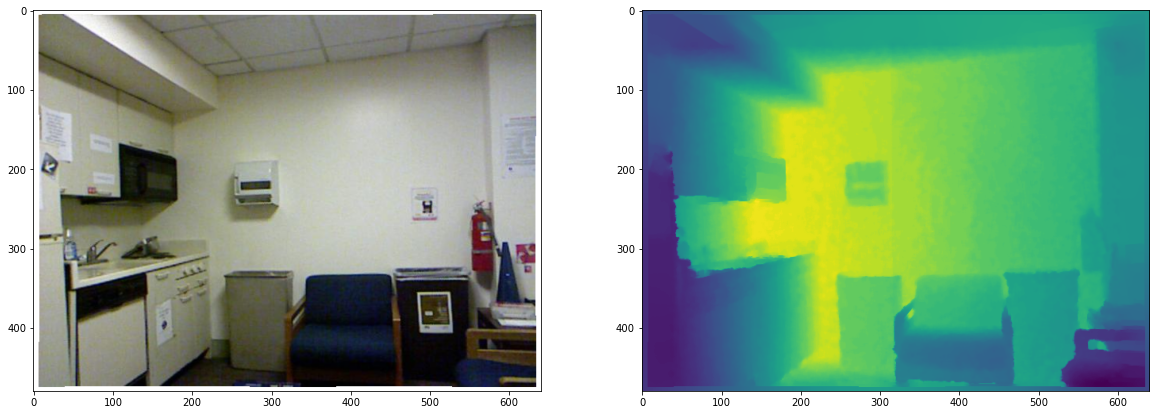

In [7]:
rgbd_image = create_rgbd_image(images[0], depths[0])

In [8]:
pcd = point_cloud_visualization(rgbd_image)
octree = octree_visualization(pcd)